In [21]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 

In [22]:
import requests

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/cobr.l/1d"

headers = {
    'x-rapidapi-key': "9cd97ba3camsh244cbd2e3e420a4p1e83c0jsne0fdd0787f8e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{
    "meta": {
        "currency": "GBp",
        "symbol": "COBR.L",
        "exchangeName": "LSE",
        "instrumentType": "EQUITY",
        "firstTradeDate": 1542268800,
        "regularMarketTime": 1630655275,
        "gmtoffset": 3600,
        "timezone": "BST",
        "exchangeTimezoneName": "Europe/London",
        "regularMarketPrice": 1.999,
        "chartPreviousClose": 1.75,
        "priceHint": 4,
        "dataGranularity": "1d",
        "range": ""
    },
    "items": {
        "1542268800": {
            "date": "15-11-2018",
            "open": 1.67,
            "high": 1.75,
            "low": 1.67,
            "close": 1.75,
            "adjclose": 1.75
        },
        "1542355200": {
            "date": "16-11-2018",
            "open": 1.75,
            "high": 1.75,
            "low": 1.75,
            "close": 1.75,
            "adjclose": 1.75
        },
        "1542614400": {
            "date": "19-11-2018",
            "open": 1.65,
            "high": 

In [43]:
string = response.text

In [44]:
string[:1000]

'{\n    "meta": {\n        "currency": "GBp",\n        "symbol": "COBR.L",\n        "exchangeName": "LSE",\n        "instrumentType": "EQUITY",\n        "firstTradeDate": 1542268800,\n        "regularMarketTime": 1630655275,\n        "gmtoffset": 3600,\n        "timezone": "BST",\n        "exchangeTimezoneName": "Europe/London",\n        "regularMarketPrice": 1.999,\n        "chartPreviousClose": 1.75,\n        "priceHint": 4,\n        "dataGranularity": "1d",\n        "range": ""\n    },\n    "items": {\n        "1542268800": {\n            "date": "15-11-2018",\n            "open": 1.67,\n            "high": 1.75,\n            "low": 1.67,\n            "close": 1.75,\n            "adjclose": 1.75\n        },\n        "1542355200": {\n            "date": "16-11-2018",\n            "open": 1.75,\n            "high": 1.75,\n            "low": 1.75,\n            "close": 1.75,\n            "adjclose": 1.75\n        },\n        "1542614400": {\n            "date": "19-11-2018",\n         

- 获取日期data

In [45]:
def get_dates(string):
    date = re.compile('"date":((.*),)')
    date = date.findall(string)
    date = [i[0][2:12] for i in date]
    date = [datetime.strptime(i, "%d-%m-%Y").strftime("%Y-%m-%d") for i in date]
    return date

In [46]:
date = get_dates(string)
print( date[:5] )

['2018-11-15', '2018-11-16', '2018-11-19', '2018-11-20', '2018-11-21']


- 获取close价格

In [47]:
def get_close(string):
    close = re.compile('"close":((.*),)')
    close = close.findall(string)
    close = [float(i[1].strip()) for i in close]
    return close

In [48]:
close = get_close(string)
close[:5]

[1.75, 1.75, 1.65, 1.65, 1.65]

- form dataframe

In [49]:
def form_df(date, close, col_name1, col_name2):
    return pd.DataFrame({col_name1:date, col_name2:close })

In [50]:
cobr = form_df(date, close, 'date', 'cobr_close')
cobr.set_index('date', drop=True, inplace=True)
cobr.tail(3)

,cobr_close
date,
2021-09-01,1.95
2021-09-02,1.95
2021-09-03,2.00


- save dataframe as csv

- IPO and Placing info

In [51]:
p1_sprice = 2.25
p1_wprice = 3
p1_date = '2020-01-01'
p1_swratio = 1/1
p2_sprice = 2.3
p2_wprice = 3
p2_date = '2020-09-01'
p2_swratio = 1/1

#### 技巧：没有数值的Entry设置成None的话，它们就不参与之后的计算。省很多事儿。

In [52]:
cobr['p1_sprice'] = [p1_sprice if i  >= p1_date else None for i in cobr.index]
cobr['p1_wprice'] = [p1_wprice if i  >= p1_date else None for i in cobr.index]

cobr['p2_sprice'] = [p2_sprice if i  >= p2_date else None for i in cobr.index]
cobr['p2_wprice'] = [p2_wprice if i  >= p2_date else None for i in cobr.index]

- If each Placing or IPO investor invest 10000 pounds ever time, what are the positions look like？

In [53]:
# fund = 10000

# cobr['p1_sposition'] = [round(fund/p1_sprice,2) if i >= p1_date else 0 for i in cobr.index]
# cobr['p1_wposition'] = cobr['p1_sposition']*p1_swratio


# cobr['p2_sposition'] = [round(fund/p2_sprice,2) if i >= p2_date else 0 for i in cobr.index]
# cobr['p2_wposition'] = cobr['p2_sposition']*p2_swratio

- What is the profit looks like， respectively?

In [54]:
# Profit from the shares, 

cobr['p1_spft'] = cobr.cobr_close - cobr['p1_sprice']


cobr['p2_spft'] = cobr.cobr_close - cobr['p2_sprice']


In [55]:
# Profit from the warranties

p1_wprofit = []
for i,j in zip(cobr.cobr_close, cobr['p1_wprice']):
    if i - j >0:
        p1_wprofit.append(round(i-j,2))
    else:
        p1_wprofit.append(0)

cobr['p1_wpft'] = p1_wprofit

p2_wprofit = []
for i,j in zip(cobr.cobr_close, cobr['p2_wprice']):
    if i - j >0:
        p2_wprofit.append(round(i-j,2))
    else:
        p2_wprofit.append(0)

cobr['p2_wpft'] = p2_wprofit

In [56]:
cobr = cobr.fillna(0)

In [57]:
cobr

,cobr_close,p1_sprice,p1_wprice,p2_sprice,p2_wprice,p1_spft,p2_spft,p1_wpft,p2_wpft
date,,,,,,,,,
2018-11-15,1.75,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-16,1.75,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-19,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-20,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-21,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-22,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-23,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-26,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2018-11-27,1.25,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00


- Average Profit per share

2 placings have done, the denominator is 2

In [58]:
cobr['avg_pft_ps'] = (cobr['p1_spft']+cobr['p2_spft']+cobr['p1_wpft']+cobr['p2_wpft'])/2

In [61]:
cobr['avg_pft_on_sprice'] = cobr['cobr_close'] +cobr['avg_pft_ps']

In [62]:
cobr

,cobr_close,p1_sprice,p1_wprice,p2_sprice,p2_wprice,p1_spft,p2_spft,p1_wpft,p2_wpft,avg_pft_ps,avg_pft_on_sprice
date,,,,,,,,,,,
2018-11-15,1.75,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.750
2018-11-16,1.75,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.750
2018-11-19,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.650
2018-11-20,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.650
2018-11-21,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.650
2018-11-22,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.650
2018-11-23,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.650
2018-11-26,1.65,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.650
2018-11-27,1.25,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,1.250


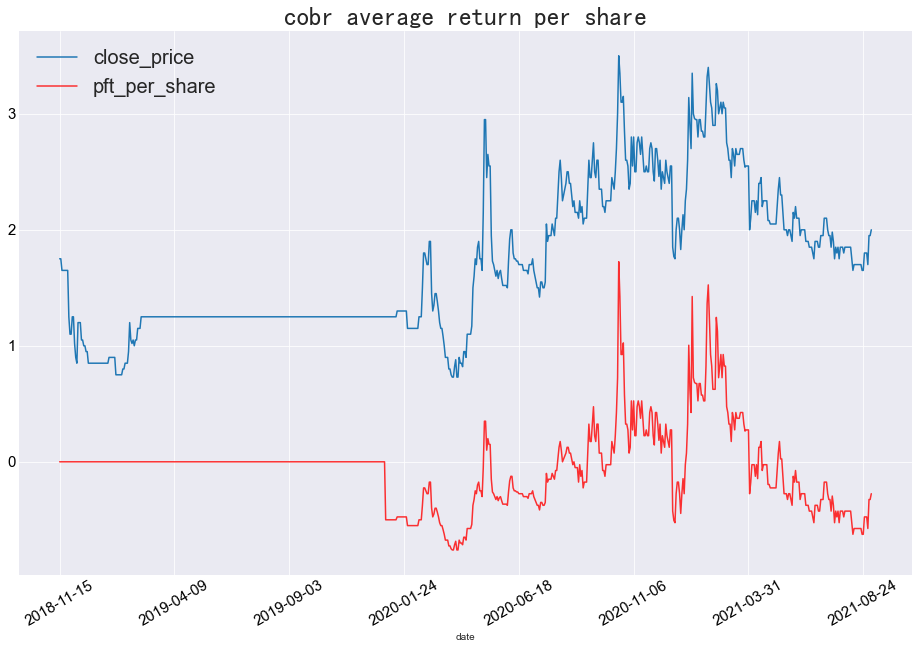

In [42]:
title = 'cobr average return per share'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')
cobr.cobr_close.plot()
cobr.pft_per_share.plot(color='r', alpha=0.8)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend(('close_price','pft_per_share'),loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()

- 上图不是很好看出收益与股价的关系

下图将股价和平均收益合并显示，让横坐标共轴。

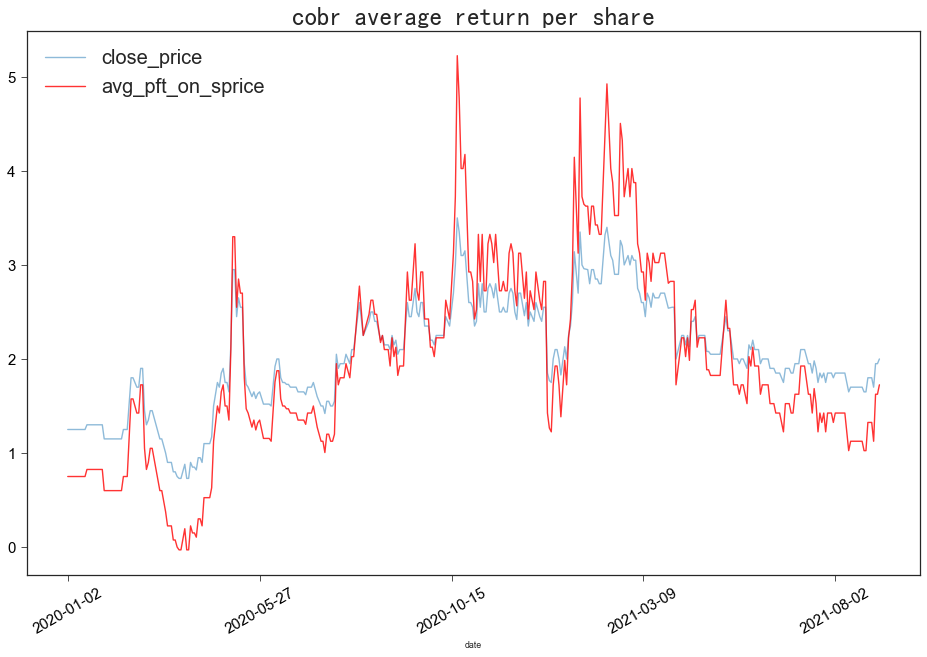

In [79]:
title = 'cobr average return per share'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-ticks')

cobr.loc[cobr.index > '2020-01-01'].cobr_close.plot(alpha=0.5)
cobr.loc[cobr.index > '2020-01-01'].avg_pft_on_sprice.plot(color='r', alpha=0.8)

plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend(('close_price','avg_pft_on_sprice'),loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()